# 타이타닉 생존율 분류모델 

## 라이브러리 불러오기 

In [1]:
# 캐글의 타이타닉 데이터를 이용하여 데이터 전처리, 데이터 마이닝, 데이터 분석. 캐글의 타이타닉 대회 (링크)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 50초 예측결과 제출하려면 좌측면 버튼
train_df = pd.read_csv('/aiffel/data/train.csv')
test_df = pd.read_csv('/aiffel/data/test.csv')
combine = [train_df, test_df] #

In [3]:
train_df0 = train_df.copy()

## 데이터 확인

In [4]:
print('+++++++++++++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-------------------------------')
print('Train columns :', train_df.columns.values) # Parch 덖다
print('Test columns :', test_df.columns.values )
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
+++++++++++++++++++++++++++++++


In [5]:
train_df.head() # Pclass = ticket 5-3 5:30 , Parch-  3:30 parent, children 수

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## train 데이터 전처리

In [7]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1) # 변수제거 
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [10]:
train_df.info() # 제거된 colum 확인. 
train_df_temp = train_df.copy() #Q temp 뭐였지?  
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4

## 결측치 채우기

In [11]:
train_df['Age'] = train_df['Age'].fillna(0) #Q, sex는 왜 안바꿔?
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('The most frequent value:',train_df['Embarked'].mode()[0])
train_df.info()

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


## 변수변환 - 인코딩

In [12]:
train_df["Sex"] = train_df["Sex"].astype('category') # 범주형을 수치형으로, 남자 1, 여자 0, 정박지 0,1,2,로 
train_df["Sex"] = train_df["Sex"].cat.codes

train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes

train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,0.0,1,2,2
889,1,1,1,26.0,0,0,0
890,0,3,1,32.0,0,0,1


## 데이터 탐색 및 시각화

### 데이터 통계량 탐색

아래 코드 블럭을 통해서 mean, std, min, 25%, 50%, 75%, max 값통계치를 확인가능. 25%, 50%, 75%을 통해서 IQR 도 계산이 가능


In [13]:
# 5- 3 Q IQR Q 2없나 ? InterQuartile Range, 사분범위 , 교재 그림참조
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


## Label과의 연관성

In [14]:
# Pclass는 생존율과 높은 연관성 , Parch 수가 적은 1,2,3이 높은 생존율, 승선항 C가 잴 높은 생존율
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


## 시각화를 통해 각 변수들의 분포도 파악

### 생존율은 히스토그램으로 표현

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


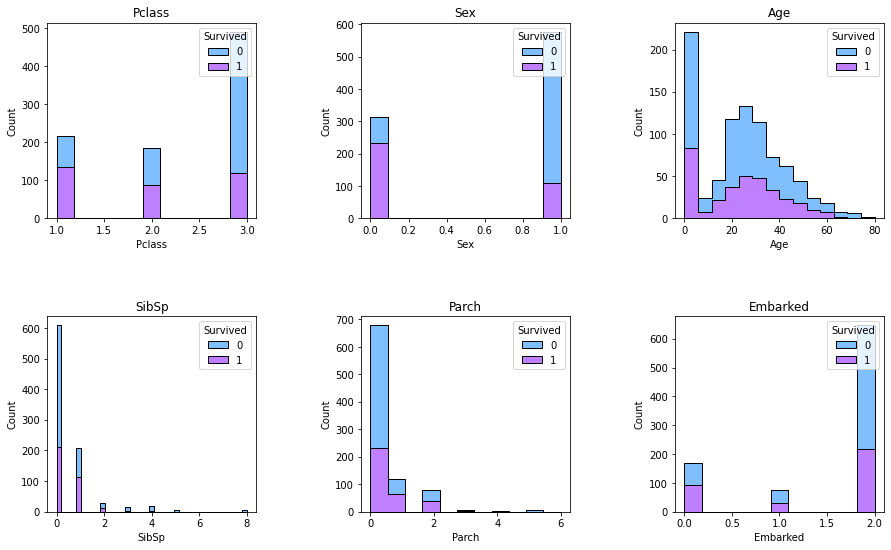

In [15]:
col_name = train_df.columns[1:] #컬럼 0번째 ID columns 빼고 1~끝까지

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k') # 2*3 배열
fig.subplots_adjust(hspace = .5, wspace=.5) # Q. https://www.tutorialspoint.com/how-to-adjust-the-space-between-matplotlib-seaborn-subplots-for-multi-plot-layout에 step으로 나오는데 그래프엔 그것도 아닌데 ? 
print(axs) 

axs = axs.ravel() # Q뭔 다차원배열?  1차원 배열을 다차원 배열로 재구성/재배열 해주는 NumPy의 reshape() 함수와 반대의 기능을 하는 함수가 ravel(), flatten() 함수
print(axs) # 차원이 flatten 된건지 확인 .*** 1차원으로 바꿔야하는 이유 : for in문에 위에꺼는 한개씩 다 실행이 안되고 위에꺼는 위3개되고 밑에 3개 되니까 안됨

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',# palette는 색상표, cool은 아래색상
                 multiple="stack",ax=axs[i],element="step") # Q 4:30 각변수들의 class의 count와 이에따른 상대적 생존율을 작업하는 히스토그램을 플라트했다? hue : 색깔은 각각의 생존율을 나타냄
    axs[i].set_title(col_name[i]) # 컬럼 네임을 제목으로, 아래 하늘색:생존자, 보라색:사망자, hue등 검색해도 선명치않으면 코드서 'hue='Survived' 빼보면 선명
    # Pclass x축 1,2,3등급, 1등급 생존율 높음. Sex : x축 0여성, 1남자, Age : 0에서 많은건 결측치 제거할때 나이모르는걸 다 0으로.

### 각 변수들간의 상관관계는 pairplot 으로

<Figure size 648x648 with 0 Axes>

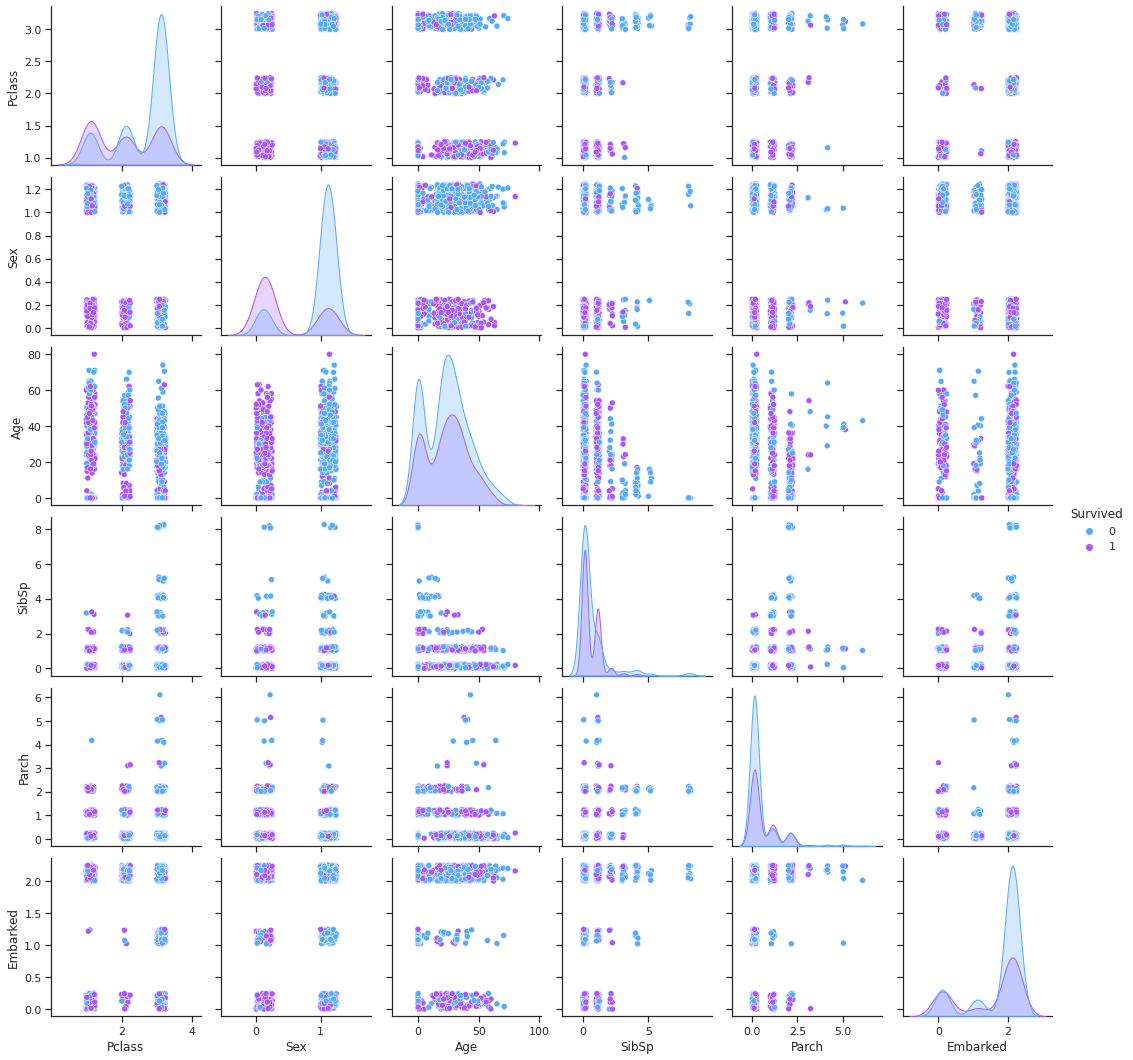

In [16]:
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/400
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='cool')

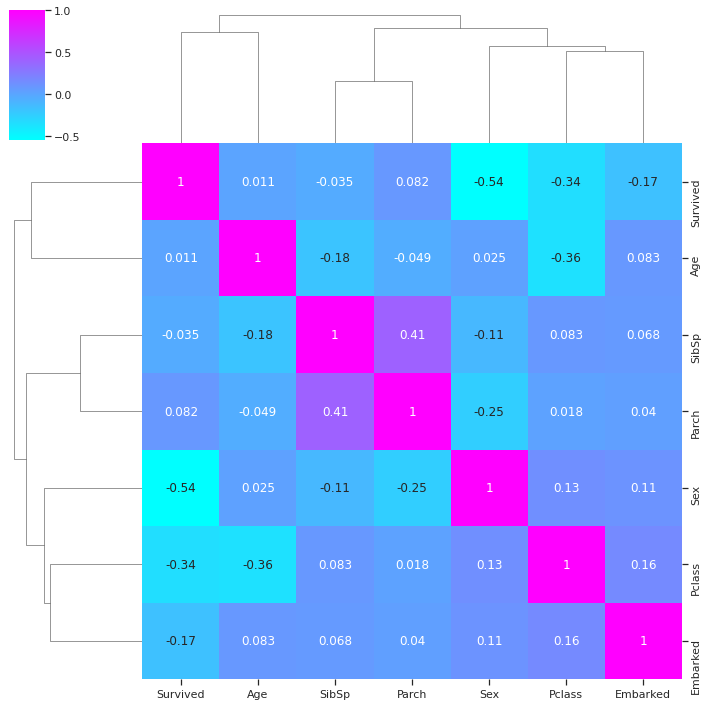

In [17]:
corr = train_df.corr() # 11분, 대각선 자신과의 상관관계고 값은 1 , 생존율을은 성별과 -0.54.로 음의 상관관계인건 여성이 생존율이 더 크기때문, 12분에 그래프 그려줬으나  Q 뭔얘기?
sns.clustermap(corr,annot = True,cmap = 'cool') # heatmap = clustermap  Q corr,annot = True 뭔얘기?

13분 피어슨 상관계수 +1 ~ -1의 상관관계 갖음. 상관관계 없으면 0

## 모델링

train/test 데이터 준비 -모델링에 앞서 train/test 데이터별로 작업 모델링에 앞서 train/test 데이터별로 작업 

In [18]:
# 연관관계 없는거 제거. 아까 한거 ? -> '데이터 전처리'에서  drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1) 변수제거 였음.
X_train = train_df.drop(['Survived'], axis=1) # 강의 14분엔 'Survived', 'sibsp', 'parch' 써있고 'sibsp', 'parch'간 상관관계적어 제거한다고 함
y_train = train_df['Survived'] # Q. 'sibsp', 'parch'넣으면 KeyError: "['sibsp' 'parch'] not found in axis"
print(X_train.shape,y_train.shape)

(891, 6) (891,)


 ## test 데이터 처리

In [19]:
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
test_df['Age'] = test_df['Age'].fillna(0)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:',test_df['Embarked'].mode()[0])
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes

test_df.info()
X_test = test_df.copy()
print(X_test.shape) # Q 아까 없던 shape는 크기 보여주는거?, 14:30 총 4개이 변수값아이고 난 왜 6개? 데이터 준비 끝났으니 모델에 태워본다? test data로 예측.   

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int8   
dtypes: float64(1), int64(3), int8(2)
memory usage: 14.0 KB
(418, 6)


## Cross validation + Model evaluation

과적합 막기위해 K fold cross 벨리게이션 이용. ROC, AUC로 교차검증, 

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve # 라이브러리 불러옴
from sklearn.metrics import roc_auc_score # 라이브러리 불러옴 Q 바로 윗줄에서 불러온 roc 왜 또 불러?

In [21]:
def kfold(X_train,y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50) # 총 5개로 나눠서 cross validation 진행
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

## 다양한 모델에 따른 성능 평가

In [22]:
# 각 모델에 따른 하이퍼파라미터 조절 중요 Q 뭔말 ?15:30 ~15:47 이를 위해 그리즈 설취 씨비도 중요 out of 스코쉽으로 중요
import warnings
warnings.filterwarnings('ignore')
models = [ 
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test) #  random forest가 젤 높은 성과 나타냄. random forest에 모델을 적용할 생각. 

model: SVC(gamma='auto')
Score: 0.8754203633956852
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8678455489544101
model: SGDClassifier(max_iter=100)
Score: 0.7348527349228611
model: SGDClassifier()
Score: 0.7118643333280804
model: LogisticRegression()
Score: 0.7946152512725153
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9197527459539531
model: RandomForestClassifier()
Score: 0.9424815229210332


ROC는 이진분류모델의 예측성능을 판단하는 평가지표.  타이타닉 생존율은 2진 분류모델  예측성능에 적합. 

AUC: 0.9972943722943722


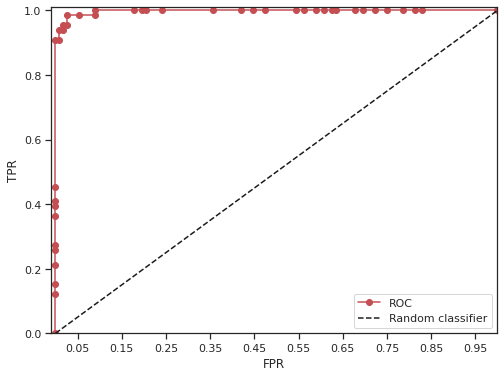

In [24]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred,pred_proba_class1))

## REFFERENCE

https://rfriend.tistory.com/349 

https://blog.naver.com/PostView.nhn?

https://ordo.tistory.com/100

https://circlezoo.tistory.com/59

https://butter-shower.tistory.com/210

blogId=owl6615&logNo=221472919112&parentCategoryNo=118&categoryNo=119&viewDate=&isShowPopularPosts=false&from=postView


## 총평가  

다양한 모델에 따른 성능평가에서 RandomForest 분류가 가장 정확도가 높게나옴. 

ROC, AUC 평가지표로 교차검증을 했을때 AUC가 0.77에 근접하게 나와 1에 좀더 수렴하게 정확도가 올라가는 모델을 선택할 필요가 있음.
Random Forest 분류기로 바꿔보니 정확도 

## 회고 

-  생존율 히스토그램  여러개 그리는거 코드가 이해가 안가 엄청난 검색과 조원들의 도움으로 모르는거 많이 해결돼서 후련했습니다 ~
  다차원배열, 1차원 배열을 알게돼서 왜 flatten 해야하는지 이해했어요. 
  flatten() 함수함께 ravel()함수를 이해하게됐음.
  
- '사분범위' 가 좌표 사분위랑 다른거였음. 새로운 사실 !. 아 복잡. 

- 다양한 모델에 따른 성능 평가를 할때 'warning' 에러가 주르르 나와 해결하는데 시간 많이 걸림. 여기저기 검색해서 겨우 warnings.filterwarnings('ignore') 로 해결.

- 시각화등 모델에 맞는것 적용하는것 아지도 파악안돼. 언제쯤 그게 될까 ... 에효 ~